The Original Datasethere

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

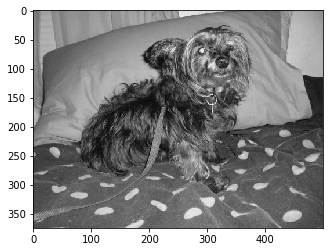

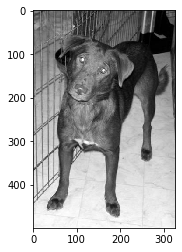

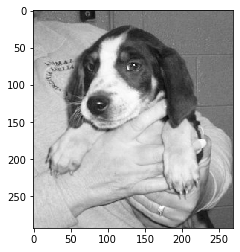

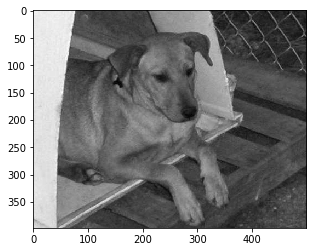

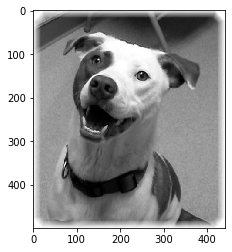

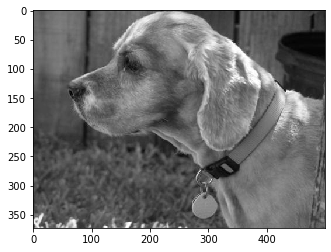

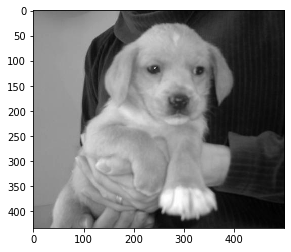

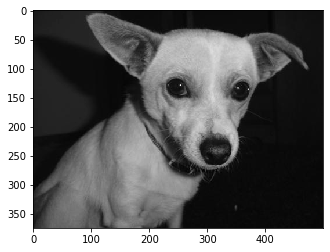

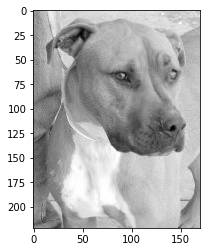

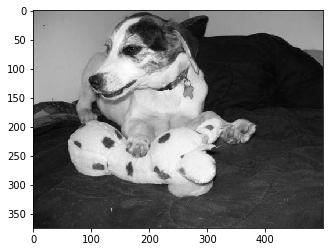

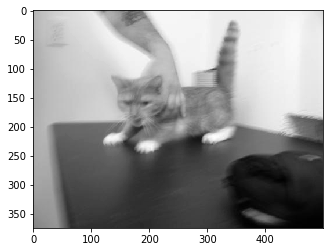

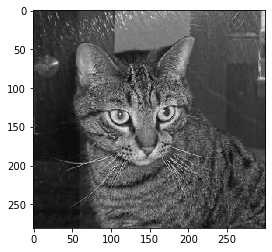

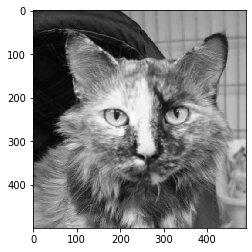

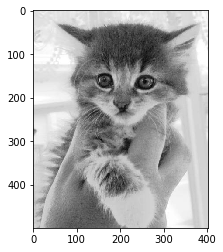

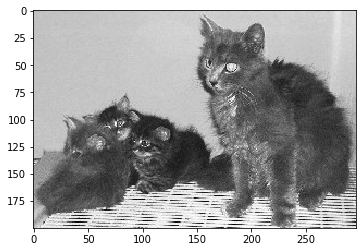

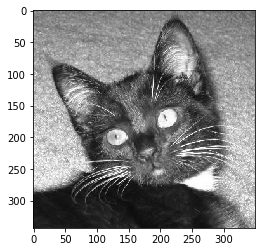

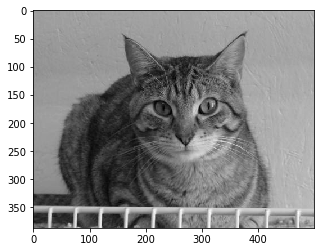

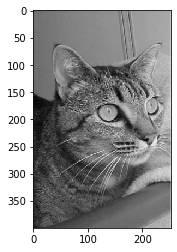

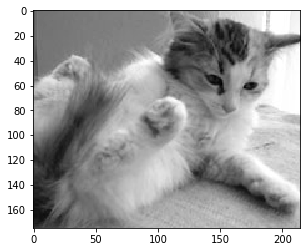

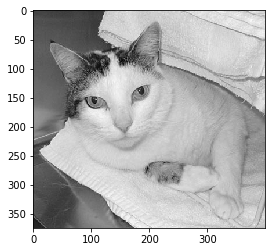

In [3]:
DATADIR = 'D:\\Downloads\\PetImages'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        if x==10 : 
            break        

In [4]:
print(img_array)
print(img_array.shape)

[[ 58  59  59 ... 193 192 192]
 [ 59  59  60 ... 190 191 192]
 [ 59  60  61 ... 188 187 187]
 ...
 [ 37  37  37 ... 174 173 169]
 [ 37  37  36 ... 176 179 180]
 [ 36  36  36 ... 168 171 172]]
(375, 400)


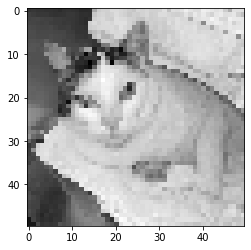

In [5]:
#IMG_SIZE = 5
#IMG_SIZE = 10
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(training_data))

100%|██████████| 500/500 [00:00<00:00, 599.56it/s]


999


In [7]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
0
1
0
0
1
1


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)

[[[[ 81]
   [189]
   [140]
   ...
   [104]
   [104]
   [103]]

  [[188]
   [193]
   [183]
   ...
   [ 37]
   [118]
   [ 95]]

  [[180]
   [193]
   [180]
   ...
   [111]
   [104]
   [100]]

  ...

  [[170]
   [164]
   [176]
   ...
   [176]
   [173]
   [172]]

  [[176]
   [168]
   [164]
   ...
   [173]
   [173]
   [165]]

  [[155]
   [173]
   [172]
   ...
   [172]
   [172]
   [167]]]]


In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(X, y, epochs=3)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [ ]:
test_loss, test_acc = model.evaluate(X,y)
test_acc